# Movie Recommendation Using Clustering and Content_Based Filtering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IMDb_Movie_Dataset.csv', index_col=0)
df.head()

,Title,Year,Runtime,Genre,Rating,Director,Stars,Vote
0,Jai Bhim,2021,164,"Crime, Drama",9.5,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan, Rajisha Vij...",130953
1,The Chaos Class,1975,87,"Comedy, Drama",9.3,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...",39272
2,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2492791
3,The Godfather,1972,175,"Crime, Drama",9.2,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1719600
4,Mirror Game,2016,147,"Crime, Mystery, Thriller",9.1,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Part...",25248


## K-Means Clustering

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from datetime import date
import tensorflow as tf
import random

In [4]:
# get columns with numerical value
data_num = df.drop(df.columns[[0, 3, 5, 6]], axis=1)
data_num.head()

,Year,Runtime,Rating,Vote
0,2021,164,9.5,130953
1,1975,87,9.3,39272
2,1994,142,9.3,2492791
3,1972,175,9.2,1719600
4,2016,147,9.1,25248


In [5]:
# convert release year into movie's age
current_year = date.today().year
age = []
for i in data_num['Year']:
    age.append(current_year - i)
age = pd.DataFrame(age, columns=['Year'])
data_num['Year'] = age['Year']
data_num.head()

,Year,Runtime,Rating,Vote
0,0,164,9.5,130953
1,46,87,9.3,39272
2,27,142,9.3,2492791
3,49,175,9.2,1719600
4,5,147,9.1,25248


In [6]:
scaler = MinMaxScaler()
features = scaler.fit_transform(data_num)

In [7]:
inertia = []
for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

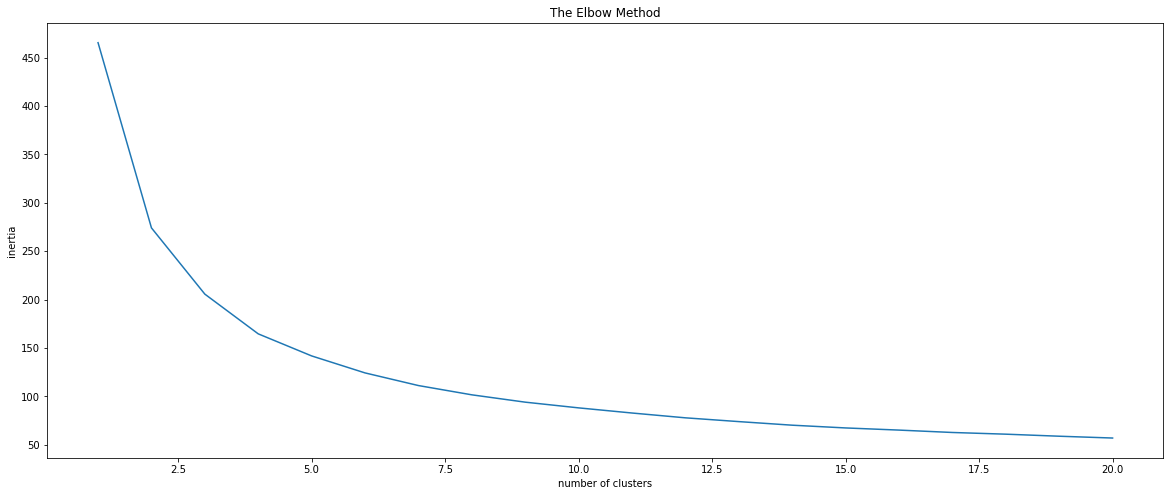

In [8]:
#Visualizing the ELBOW method to get the optimal value of K
plt.figure(figsize=(20, 8))
plt.plot(range(1,21), inertia)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [9]:
# to initialize and determine the starting centroids of the clusters
tf.compat.v1.random.set_random_seed(1234)

In [10]:
# K-Means clustering
kmeans = KMeans(
        n_clusters=10, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(features)
df['Label']=kmeans.labels_
df.head()

,Title,Year,Runtime,Genre,Rating,Director,Stars,Vote,Label
0,Jai Bhim,2021,164,"Crime, Drama",9.5,T.J. Gnanavel,"Suriya, Lijo Mol Jose, Manikandan, Rajisha Vij...",130953,5
1,The Chaos Class,1975,87,"Comedy, Drama",9.3,Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...",39272,4
2,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2492791,3
3,The Godfather,1972,175,"Crime, Drama",9.2,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1719600,3
4,Mirror Game,2016,147,"Crime, Mystery, Thriller",9.1,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Part...",25248,5


<AxesSubplot:xlabel='Label', ylabel='count'>

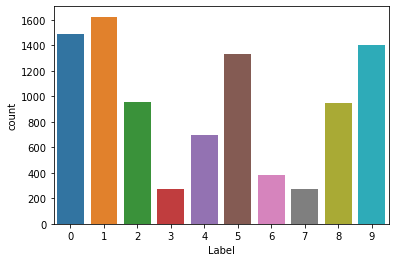

In [11]:
sns.countplot(x='Label', data=df)

## Content-Based Filtering

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [13]:
# concatenate Title, Genre, Director, & Stars columns
data_string = []
for i in range(len(df)):
    tmp = ''
    tmp = str(df['Title'][i]) + ' ' + str(df['Genre'][i]) + ' ' + str(df['Director'][i]) + ' ' + str(df['Stars'][i])
    data_string.append(tmp.replace(',', ''))

In [14]:
# calculate text similarity
tfidf_vectorizer = TfidfVectorizer()
matrix = tfidf_vectorizer.fit_transform(data_string)
kernel = linear_kernel(matrix, matrix)

## Get Recommendation

In [15]:
def get_recommendation(movie_id):
    movie_list = list(enumerate(kernel[movie_id]))
    movie_list = sorted(movie_list, key=lambda x: x[1], reverse=True)
    
    movie_cluster = df['Label'][movie_id]
    
    movie_rec = []
    for i in movie_list:
        if len(movie_rec) == 11:
            break
        if df["Label"][i[0]] == movie_cluster:
            movie_rec.append(i[0])
        
    return movie_rec[1:]

Test movie recommendation

In [16]:
movie = 'Iron Man'
movie_index = df.index[df['Title'] == movie].values[0]
movie_rec = get_recommendation(movie_index)

print("Movie recommendation:")
rec = []
for i in movie_rec:
    tmp = []
    tmp.append(df['Title'][i])
    tmp.append(df['Year'][i])
    tmp.append(df['Label'][i])
    rec.append(tmp)
rec = pd.DataFrame(rec, columns=['Title', 'Year', 'Label'])
rec

Movie recommendation:


,Title,Year,Label
0,Iron Man 2,2010,3
1,Iron Man 3,2013,3
2,Spider-Man: Homecoming,2017,3
3,The Avengers,2012,3
4,Avengers: Age of Ultron,2015,3
5,Avengers: Infinity War,2018,3
6,Captain America: Civil War,2016,3
7,Sherlock Holmes,2009,3
8,Zodiac,2007,3
9,Avengers: Endgame,2019,3


## Preprocess Movie Recommendation Database

In [17]:
# save recommendation on every movie
movie_rec = []

for i in range(len(kernel)):
    movie_cluster = df['Label'][i]
    
    movie_list = list(enumerate(kernel[i]))
    movie_list = sorted(movie_list, key=lambda x: x[1], reverse=True)
    
    movie_rec_list = []
    for j in range(1, len(movie_list)):
        if len(movie_rec_list) == 11:
            break
        if df["Label"][movie_list[j][0]] == movie_cluster:
            movie_rec_list.append(movie_list[j][0])
        
    movie_rec.append(movie_rec_list)

# convert to pandas dataframe
movie_rec = pd.DataFrame(movie_rec)
movie_rec.head()

,0,1,2,3,4,5,6,7,8,9,10
0,249,1492,330,711,1434,247,5,2095,3881,2122,2816
1,14,13,23,35,177,37,32,127,36,8,56
2,59,61,760,3599,383,2074,934,132,949,958,80
3,9,134,277,195,438,1206,181,1764,2890,132,2077
4,327,158,333,380,2385,880,2185,2048,1774,2176,2932


In [18]:
# save dataset to csv
movie_rec.to_csv('movie_recommendation_dataset.csv', index=False)